In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('Resources/data3_test.csv',parse_dates =["Booking_year_month"])
df.head()

,Unnamed: 0,Booking_year_month,DOB_month,total_crime,age<25_1,age26-50_1,age>50_1,day_of_week_Monday_1,day_of_week_Tuesday_1,day_of_week_Wednesday_1,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,2015-08-01,1013,142,18,92,32,14,13,29,...,23,21,14,142,0,0,0,13,52,77
1,4,2015-09-01,803,153,15,112,26,24,17,20,...,18,22,32,153,0,0,0,14,43,96
2,5,2015-10-01,1057,121,11,84,26,13,22,23,...,13,10,16,121,0,0,0,11,44,66
3,6,2015-11-01,774,156,16,92,48,13,16,21,...,18,26,23,0,0,0,156,10,46,100
4,7,2015-12-01,891,114,4,81,29,18,18,25,...,13,17,8,0,0,0,114,5,42,67


In [12]:
# Drop innecesary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['total_crime']= df['total_crime'].astype(float)

In [13]:
# Assign the data to X and y

X = df[["CityRN_HOMELESS_1", "age26-50_1"]]
y = df["total_crime"].values.reshape(-1, 1)
print(X.shape, y.shape)

(47, 2) (47, 1)


In [14]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

### END SOLUTION

In [15]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [16]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6204542720020465
Testing Score: 0.5241407720491471


Text(0.5, 1.0, 'Residual Plot')

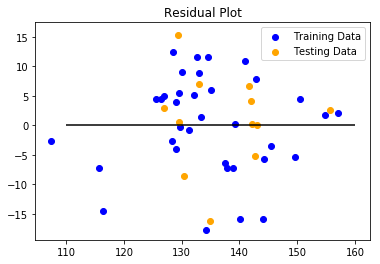

In [17]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION